In [66]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

In [67]:
data = {}
tasks = ['Essay Evaluator','Task Manager', 'Map Generator']
for task in tasks:
    data[task] = pd.read_csv(task +'.csv', index_col=0)
    
    row_1 = list(data[task].loc['Total Working'])
    row_2 = list(data[task].loc['Total Working & Accurate'])

    data[task].loc['Total Working'] = row_2
    data[task].loc['Total Working & Accurate'] = row_1

    data[task] = data[task].rename(index={'Total Working': 'Total Working \& Accurate', 'Total Working & Accurate': 'Total Working'})

data['Essay Evaluator']

<>:12: SyntaxWarning: invalid escape sequence '\&'
<>:12: SyntaxWarning: invalid escape sequence '\&'
/tmp/ipykernel_119895/242227366.py:12: SyntaxWarning: invalid escape sequence '\&'
  data[task] = data[task].rename(index={'Total Working': 'Total Working \& Accurate', 'Total Working & Accurate': 'Total Working'})


,DSPy,LMQL,MTLLM
Total Working \& Accurate,6,1,12
Total Working,4,2,0
Total Not Working,9,12,7
Total No Code Submitted,1,5,1


In [69]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

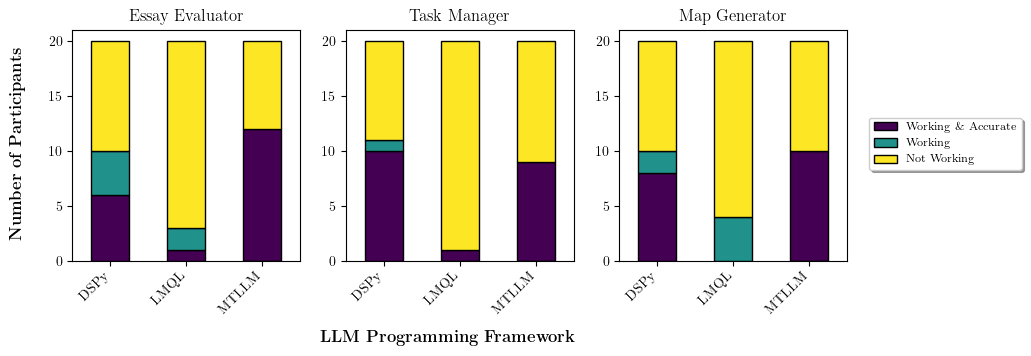

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for i,task in enumerate(data.keys()):
    # viridis, ocean
    data[task].T.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[i], title=task, edgecolor='black', linewidth=1.0)
    axes[i].legend().remove()
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
legends = data['Essay Evaluator'].T.keys()
legends = [legend.replace('Total ', '') for legend in legends]
fig.legend(legends, loc='center right',shadow=True, fontsize='small', bbox_to_anchor=(1.08, 0.5))
fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
fig.text(0.07, 0.5, r'\textbf{Number of Participants}', ha='center', va='center', rotation='vertical', fontsize=12)
plt.savefig('user_study_code_summary.png', dpi=300, bbox_inches='tight')
plt.show()




